### Provide by

นายธนชาติ เสถียรจารุการ 63340500021 <br>

นายพชพล เพชรรัตน์ 63340500036

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import QuantileTransformer
#import tensorflow as tf

df = pd.read_csv('bank-additional-full.csv', sep=';')
df = df.drop(['duration'], axis=1)
df.head()

### Data exploration


##### Check null of dataset

In [ ]:
df.info()

##### Target
The total number of data is 41188 samples devided into
- No: 36548 samples
<br>

- Yes: 4640 samples

**this means that the dataset is imbalanced**



In [ ]:
print(df['y'].value_counts())
plt.figure(figsize = (4,4))
sns.histplot(data = df, x = 'y')
plt.show()

##### Explore numerical data

In [ ]:
cols = df.columns
num_data = list(df._get_numeric_data().columns)
cat_data = list(set(cols) - set(num_data))

plot_num = 1
plt.figure(figsize = (15,27))
for i in num_data:
    ax = plt.subplot(7, 3, plot_num)
    sns.histplot(data=df, x=i)
    plot_num += 1
plt.show()


- age
    - ages over 60 seem to be the outlier

In [ ]:
print(df['age'].value_counts())
cut_sample = df.loc[df['age'] > 60]
sns.boxplot(data = cut_sample, x = 'y', y = 'age')
plt.show()

- campaign
    - number of campaign over 20 seem to be the outlier

In [ ]:
print(df['campaign'].value_counts())
cut_sample = df.loc[df['campaign'] >= 21]
print(cut_sample['y'].value_counts())
sns.boxplot(data = cut_sample, x = 'y', y = 'campaign')
plt.show()

- pdays
    - replace value 999 to -1
    - and pdays value over 15 seem to be the outlier
    - group data to 2 categorical

In [ ]:
df['pdays'] = df['pdays'].replace([999], [-1])
print(df['pdays'].value_counts())

cut_sample = df.loc[df['pdays'] > 15]
print(cut_sample['y'].value_counts())
sns.boxplot(data = cut_sample, x = 'y', y = 'pdays')
plt.show()

- previous
    - previous values over 3 seem to be the outlier but most of the sample that has previous values over 3 have target 'yes' i guess it is positive to our model so I decided to keep it
    - group data to 2 categorical

In [ ]:
print(df['previous'].value_counts())

cut_sample = df.loc[df['previous'] > 3]
print(cut_sample['y'].value_counts())
sns.boxplot(data = cut_sample, x = 'y', y = 'previous')
plt.show()

- emp.var.rate

In [ ]:
df['emp.var.rate'].value_counts()
unique = df['emp.var.rate'].unique()
print(sorted(unique))

- cons.price.idx

In [ ]:
df['cons.price.idx'].value_counts()
unique = df['cons.price.idx'].unique()
print(sorted(unique))

- cons.conf.idx

In [ ]:
df['cons.conf.idx'].value_counts()
unique = df['cons.conf.idx'].unique()
print(sorted(unique))

- euribor3m

In [ ]:
df['euribor3m'].value_counts()
unique = df['euribor3m'].unique()
print(sorted(unique))

- nr.employed

In [ ]:
df['nr.employed'].value_counts()
unique = df['nr.employed'].unique()
print(sorted(unique))

##### Summarize numeric outlier
- age values over 60
- campaign values over 20
- pdays values over 15

##### Explore categorical data


In [ ]:
plot_num = 1
plt.figure(figsize = (15,27))
for i in cat_data:
    ax = plt.subplot(7, 3, plot_num)
    sns.histplot(data=df, x=i)
    plot_num += 1
plt.show()

- day_of_week

In [ ]:
df['day_of_week'].value_counts()

- job
    - consider to cut unknown job

In [ ]:
print(df['job'].value_counts())
cut_sample = df.loc[df['job'] == 'unknown']
print(cut_sample['y'].value_counts())
sns.countplot(data = cut_sample, x = 'job', hue = 'y')
plt.show()

- poutcome

In [ ]:
df['poutcome'].value_counts()


- marital
    - consider to cut unknown marital status

In [ ]:
print(df['marital'].value_counts())
cut_sample = df.loc[df['marital'] == 'unknown']
print(cut_sample['y'].value_counts())
sns.countplot(data = cut_sample, x = 'marital', hue = 'y')
plt.show()


- housing
    - consider to cut unknown housing data
    - change to numerical data

In [ ]:
print(df['housing'].value_counts())
cut_sample = df.loc[df['housing'] == 'unknown']
print(cut_sample['y'].value_counts())
sns.countplot(data = cut_sample, x = 'housing', hue = 'y')
plt.show()

- month
    - consider to change months categorical to numerical

In [ ]:
df['month'].value_counts()

- loan
    - consider to cut unknown loan data
    - change to numerical data

In [ ]:
print(df['loan'].value_counts())
cut_sample = df.loc[df['loan'] == 'unknown']
print(cut_sample['y'].value_counts())
sns.countplot(data = cut_sample, x = 'loan', hue = 'y')
plt.show()

- default
    - consider to cut yes data then change to numerical data

In [ ]:
print(df['default'].value_counts())
cut_sample = df.loc[df['default'] == 'yes']
print(cut_sample['y'].value_counts())
sns.countplot(data = cut_sample, x = 'default', hue = 'y')
plt.show()

- education
    - consider to cut illiterate education level

In [ ]:
print(df['education'].value_counts())
cut_sample = df.loc[df['education'] == 'illiterate']
print(cut_sample['y'].value_counts())
sns.countplot(data = cut_sample, x = 'education', hue = 'y')
plt.show()

- contact
    - change to numerical data

In [ ]:
df['contact'].value_counts()

##### Summarize categorical outlier
- cut unknown from job data
- cut unknown from marital data
- cut unknown from housing data
- cut unknown from loan data
- cut yes from default data
- cut illiterate from education data
- change month categorical to numerical
- change default data to numerical
- change loan data to numerical
- change contact data to numerical
- change housing data to numerical
- change target data to numerical
- group previos data
- group pdays data

##### Remove outlier

In [ ]:
df = df.loc[df['age'] <= 60]
df = df.loc[df['campaign'] <= 20]
df = df.loc[df['pdays'] <= 15]
df = df.loc[df['job'] != 'unknown']
df = df.loc[df['marital'] != 'unknown']
df = df.loc[df['housing'] != 'unknown']
df = df.loc[df['loan'] != 'unknown']
df = df.loc[df['default'] != 'yes']
df = df.loc[df['education'] != 'illiterate']
df['month'] = df['month'].replace(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], list(range(1,13,1)))
df['default'] = df['default'].replace(['no', 'unknown'], [0,1])
df['loan'] = df['loan'].replace(['no', 'yes'], [0,1])
df['housing'] = df['housing'].replace(['no', 'yes'], [0,1])
df['contact'] = df['contact'].replace(['telephone', 'cellular'], [0,1])

df['y'] = df['y'].replace(['no', 'yes'], [0, 1])

##### group data
df['pdays'] = df['pdays'].replace(list(range(16)), ([1]*16))
df['pdays'] = df['pdays'].replace([-1], (0))
df['previous'] = df['previous'].replace(list(range(1,16,1)), ([1]*15))

##### Distribution of numerical data

In [ ]:
cols = df.columns
num_data = list(df._get_numeric_data().columns)
cat_data = list(set(cols) - set(num_data))

plot_num = 1
plt.figure(figsize = (15,27))
for i in num_data:
    ax = plt.subplot(7, 3, plot_num)
    sns.histplot(data=df, x=i)
    plot_num += 1
plt.show()

##### Correct skewed data

In [ ]:
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=1)
skewed_data_list = ['age','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
x = df[skewed_data_list].values
X_trans = quantile_transformer.fit_transform(x)
df[skewed_data_list] = X_trans

plot_num = 1
plt.figure(figsize = (15,27))
for i in num_data:
    ax = plt.subplot(7, 3, plot_num)
    sns.histplot(data=df, x=i, kde = True)
    plot_num += 1
plt.show()

In [ ]:
plot_num = 1
plt.figure(figsize = (15,27))
for i in cat_data:
    ax = plt.subplot(7, 3, plot_num)
    sns.countplot(data=df, x=i, hue = 'y')
    plot_num += 1
plt.show()

##### Correlation between numerical data and target
- the following list below has a high correlation with the target
    - default
    - contact
    - pdays
    - previous
    - emp.var.rate
    - cons.price.idx
    - euribor3m
    - nr.employed

<br>

- the following list below has a low correlation with target
    - age
    - housing
    - loan
    - month
    - cons.conf.idx
    - campaign

<br>

- the following pair below has a high correlation between feature we devide into 3 range as below

    - range 1: correlation 0.7 - 1
        - 0.96: emp.var.rate // nr.employed
        - 0.85: emp.var.rate // euribor3m
        - 0.84: euribor3m // nr.employed

        <br>

    - range 2: correlation 0.4 - 0.7
        - 0.54: contact // cons.price.idx
        - 0.47: pdays // previous
        - 0.47: emp.var.rate // cons.price.idx
        - 0.44: previous // euribor3m
        - 0.42: cons.price.idx // euribor3m
        
        <br>

    - range 3: correlation 0.2 - 0.4
        - 0.37: previous // nr.employed
        - 0.37: previous // emp.var.rate
        - 0.34: cons.prive.idx // nr.employed
        - 0.33: contact // month
        - 0.31: month // cons.conf.idx
        - 0.29: pdays // euribor3m
        - 0.22: pdays // nr.employed
        - 0.21: contact // previous
        - 0.20: age // default

In [ ]:
num_df = df[num_data]
plt.figure(figsize = (16,9))
sns.heatmap(round(df.corr(), 2), annot=True)
plt.show()

- using ANOVA to verify correlation

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

x = num_df.iloc[:,:-1]
y = num_df['y']
anova = SelectKBest(f_classif, k=8)
x_new = anova.fit(x,y)

col = anova.get_support(indices=True)
x_new = x.iloc[:,col]
x_new.head()

- Visualize data that have a high relation to the target
    - according to the figure below, it obviously show the separation of the target

In [ ]:
select_value_data = ['emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed']
select_count_data = ['default', 'contact', 'pdays', 'previous']

plot_num = 1
plt.figure(figsize = (15,27))
for i in select_value_data:
    ax = plt.subplot(7, 3, plot_num)
    sns.boxplot(data=df, x='y', y=i)
    plot_num += 1
plt.show()

plot_num = 1
plt.figure(figsize = (15,27))
for i in select_count_data:
    ax = plt.subplot(7, 3, plot_num)
    sns.countplot(data=df, x=i, hue='y')
    plot_num += 1
plt.show()

- Visualize data that have a low relation to the target
    - according to the figure below the data will distribute on the same level. **This is the reason that support the removal of these data**

In [ ]:
cut_value_data = ['age', 'month', 'cons.conf.idx', 'campaign']
cut_count_data = ['housing', 'loan']

plot_num = 1
plt.figure(figsize = (15,27))
for i in cut_value_data:
    ax = plt.subplot(7, 3, plot_num)
    sns.boxplot(data=df, x='y', y=i)
    plot_num += 1
plt.show()

plot_num = 1
plt.figure(figsize = (15,27))
for i in cut_count_data:
    ax = plt.subplot(7, 3, plot_num)
    sns.countplot(data=df, x=i, hue='y')
    plot_num += 1
plt.show()

**loan data seem to be clearly separated but in fact the ratio between target and loan data is the same ratio**

In [ ]:
for i in range(2):
    a = df.loc[df['loan'] == i]
    count = a['y'].value_counts().values
    percent = (count[1]/(count[0] + count[1])) * 100
    print(f"loan = {i}: {percent:0.2f}%")

- Visualize data that have a high relation between feature

range 1: correlation 0.7 - 1
- all of 3 features below have a high correlation to each other
    - emp.var.rate
    - nr.employed
    - euribor3m
<br/>
<br>

- result
    - emp.var.rate and nr.employed values are very close to each other
    - select euribor3m feature to keep because it has the most correlation values and it more like normal distribution

In [ ]:
sns.jointplot(data = df, x = 'emp.var.rate', y = 'nr.employed', hue = 'y', height = 4, legend = False)
plt.show()
##### two data values are very close to each other therefore cut the lower correlation to target feature
sns.jointplot(data = df, x = 'emp.var.rate', y = 'euribor3m', hue = 'y', height = 4, legend = False)
plt.show()
sns.jointplot(data = df, x = 'euribor3m', y = 'nr.employed', hue = 'y', height = 4, legend = False)
plt.show()

range 2: correlation 0.4 - 0.7
- from range 1 we cut feature below
    - emp.var.rate
    - nr.employed
<br/>
<br/>

- in range 2 will have 4 pair
    - contact // cons.price.idx
    - pdays // previous
    - previous // euribor3m
    - cons.price.idx // euribor3m
<br/>
<br/>

- result
    - the graph between contact and cons.price.idx was seperate each other but not effect to the target therefore cut cons.price.idx feature because have lower correlation to the target
    - the graph between previous and euribor3m seem to be positive to our model we will see the relation of previous, euribor3m and target that separate range of each other
    - the graph between cons.price.idx and euribor3m does not obviously show the mathematical function therefore keep both

In [ ]:
sns.boxplot(data = df, x = 'contact', y = 'cons.price.idx', hue = 'y')
plt.show()
sns.countplot(data = df, x = 'previous', hue = 'pdays')
plt.show()
sns.boxplot(data = df, x = 'previous', y = 'euribor3m', hue = 'y')
plt.show()
sns.jointplot(data = df, x = 'cons.price.idx', y = 'euribor3m', hue = 'y')
plt.show()

range 3: correlation 0.2 - 0.4
- from range 1 we cut feature below
    - cons.price.idx
<br/>
<br/>

- in range 3 will have 5 pair
    - contact // month
    - month // cons.conf.idx
    - pdays // euribor3m
    - contact // previous
    - age // default
<br/>
<br/>

- result
    - the graph between contact and month separate range from each other but not target so cut month data because have lower correlation to the target
    - the graph between age and default separate range from each other but not target so cut age data because have lower correlation to the target
    - the graph between pdays and euribor3m seem to be positive to the model and also the graph between contact and previous seem to be positive to the model

In [ ]:
sns.boxplot(data = df, x = 'contact', y = 'month', hue = 'y')
plt.show()
sns.boxplot(data = df, x = 'month', y = 'cons.conf.idx', hue = 'y')
plt.show()
sns.boxplot(data = df, x = 'pdays', y = 'euribor3m', hue = 'y')
plt.show()
sns.boxplot(data = df, x = 'contact', y = 'previous', hue = 'y')
plt.show()
sns.boxplot(data = df, x = 'default', y = 'age', hue = 'y')
plt.show()

##### Correlation between categorical data and target 
- poutcome_nonexistent, poutcome_success and job_student have correlation to target
- other feature have few correlation to target so consider to cut all of them out except poutcome_nonexistent, poutcome_success and job_student

In [ ]:
cat_df = df[cat_data]
cat_df = pd.get_dummies(cat_df)
cat_df['y'] = df['y']
plt.figure(figsize = (32,18))
sns.heatmap(round(cat_df.corr(),2),annot=True)
plt.show()

- using chi2 to verify correlation

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

x = cat_df.iloc[:,:-1]
y = cat_df['y']
chi_2 = SelectKBest(chi2, k=3)
x_new = chi_2.fit(x,y)

col = chi_2.get_support(indices=True)
x_new = x.iloc[:,col]
x_new.head()

##### Plot between categorical data and target
according to the heatmap above, we will see a lot of no relation between categorical data and target. **using countplot to verify them**
- result
    - day_of_week data seem to be useless data
    - some feature can group each other

In [ ]:
plot_num = 1
plt.figure(figsize = (15,27))
for i in cat_data:
    ax = plt.subplot(7, 3, plot_num)
    sns.countplot(data=df, x=i, hue='y')
    plot_num += 1
plt.show()

**try to group up some categorical feature except poutcome data in the reason that we previous see the correlation to the target**
- group education to degree and basic_school
- group job to have job and no job
- group marital to alone and not alone

result
- some data is more balanced
- correlation to the target is decrease

In [ ]:
cat_df2 = df[cat_data].copy()
cat_df2['y'] = df['y']
cat_df2 = cat_df2.drop(['day_of_week'],axis=1)
##### education
degree = ['university.degree', 'professional.course']
basic_school = ['high.school', 'basic.9y', 'basic.4y', 'basic.6y', 'unknown']
cat_df2['education'] = cat_df2['education'].replace(degree, [1]*len(degree))
cat_df2['education'] = cat_df2['education'].replace(basic_school, [0]*len(basic_school))

##### job
have_job = ['admin.', 'blue-collar', 'technician', 'services', 'management', 'entrepreneur', 'self-employed', 'housemaid']
no_job = ['retired', 'unemployed', 'student']
cat_df2['job'] = cat_df2['job'].replace(have_job, [1]*len(have_job))
cat_df2['job'] = cat_df2['job'].replace(no_job, [0]*len(no_job))

##### marital
alone = ['single', 'divorced']
not_alone = ['married']
cat_df2['marital'] = cat_df2['marital'].replace(not_alone, [1]*len(not_alone))
cat_df2['marital'] = cat_df2['marital'].replace(alone, [0]*len(alone))


In [ ]:
cat_df2_cols = cat_df2.columns
plot_num = 1
plt.figure(figsize = (15,27))
for i in cat_df2_cols:
    ax = plt.subplot(7, 3, plot_num)
    sns.countplot(data=cat_df2, x=i, hue='y')
    plot_num += 1
plt.show()

plt.figure(figsize = (5,4))
sns.heatmap(round(cat_df2.corr(), 2), annot=True)
plt.show()

##### Plot between categorical data and categorical data

- non-group categorical data
    - see nothing seems to benefit for model

In [ ]:
plot_num = 1
plt.figure(figsize = (30,27))
for i in cat_data:
    for j in cat_data:
        ax = plt.subplot(5, 5, plot_num)
        sns.countplot(data=df, x=i, hue=j)
        plot_num += 1
plt.show()

- group categorical data
    - seem to be better than non-group categorical data especially the graph between target and education

In [ ]:
plot_num = 1
plt.figure(figsize = (30,27))
for i in cat_df2_cols:
    for j in cat_df2_cols:
        ax = plt.subplot(5, 5, plot_num)
        sns.countplot(data=cat_df2, x=i, hue=j)
        plot_num += 1
plt.show()

##### Plot between categorical data and numerical data

- non-group categorical data
    - previous and euribor3m
    - pdays and euribor3m
    - poutcome and euribor3m

**the pair above have a relation to the target and we realize that euribor3m data is significant to target**

In [ ]:
cols = df.columns
num_data = [ i for i in cols if (len(df[i].unique()) != 2 and df[i].dtype != 'object')]
cat_data = list(set(cols) - set(num_data))
cat_data.remove('y')
plot_num = 1
plt.figure(figsize = (48,60))
for i in cat_data:
    for j in num_data:
        ax = plt.subplot(15, 8, plot_num)
        sns.boxplot(data=df, x=i, y=j , hue='y')
        plot_num += 1
plt.show()

- group categorical data

the result is the same as non-group in this reason <span style="color:red">**we will use group dataframe to reduce the dimension**</span>

In [ ]:
group_df = df.copy()
group_df[cat_df2_cols] = cat_df2[cat_df2_cols]
plot_num = 1
plt.figure(figsize = (48,60))
for i in cat_data:
    for j in num_data:
        ax = plt.subplot(15, 8, plot_num)
        sns.boxplot(data=group_df, x=i, y=j , hue='y')
        plot_num += 1
plt.show()

### Data Preprocessing


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
from scipy import stats
from sklearn.preprocessing import QuantileTransformer, StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

#import tensorflow as tf
def removeOutlier(df:pd.DataFrame):
    ##### remove outlier
    df = df.loc[(df['age'] <= 60) & (df['campaign'] <= 20)]
    df['pdays'] = df['pdays'].replace([999], [-1])
    df = df.loc[(df['pdays'] <= 15) & 
                (df['job'] != 'unknown') & 
                (df['marital'] != 'unknown') & 
                (df['housing'] != 'unknown') &
                (df['loan'] != 'unknown') &
                (df['default'] != 'yes') &
                (df['education'] != 'illiterat')]
    return df

def convertNum2Cat(df:pd.DataFrame):
    ##### change numerical data to categorical data
    df['month'] = df['month'].replace(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], list(range(1,13,1)))
    df['default'] = df['default'].replace(['no', 'unknown'], [0,1])
    df['loan'] = df['loan'].replace(['no', 'yes'], [0,1])
    df['housing'] = df['housing'].replace(['no', 'yes'], [0,1])
    df['contact'] = df['contact'].replace(['telephone', 'cellular'], [0,1])

    df['y'] = df['y'].replace(['no', 'yes'], [0, 1])
    return df
    
def groupData(pd:pd.DataFrame):
    ### group numerical data
    ##### pdays
    df['pdays'] = df['pdays'].replace(list(range(16)), ([1]*16))
    df['pdays'] = df['pdays'].replace([-1], (0))
    #### previous
    df['previous'] = df['previous'].replace(list(range(1,16,1)), ([1]*15))
    ### group categorical data
    ###### education
    degree = ['university.degree', 'professional.course']
    basic_school = ['high.school', 'basic.9y', 'basic.4y', 'basic.6y', 'unknown']
    df['education'] = df['education'].replace(degree, [1]*len(degree))
    df['education'] = df['education'].replace(basic_school, [0]*len(basic_school))

    ##### job
    have_job = ['admin.', 'blue-collar', 'technician', 'services', 'management', 'entrepreneur', 'self-employed', 'housemaid']
    no_job = ['retired', 'unemployed', 'student']
    df['job'] = df['job'].replace(have_job, [1]*len(have_job))
    df['job'] = df['job'].replace(no_job, [0]*len(no_job))

    ##### marital
    alone = ['single', 'divorced']
    not_alone = ['married']
    df['marital'] = df['marital'].replace(not_alone, [1]*len(not_alone))
    df['marital'] = df['marital'].replace(alone, [0]*len(alone))    
    return df



def correctSkewed(df:pd.DataFrame):
    ##### correct skewed data
    quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=1)
    skewed_data_list = ['age','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
    x_skew = df[skewed_data_list].values
    X_trans = quantile_transformer.fit_transform(x_skew)
    df[skewed_data_list] = X_trans
    df_x = df.drop(['y'], axis=1)
    df_y = df['y']
    return df_x, df_y

def preprocessData(drop_list):
    df = pd.read_csv('bank-additional-full.csv', sep=';')
    df = df.drop(['duration'], axis=1)
    df = removeOutlier(df)
    df = convertNum2Cat(df)
    df = groupData(df)
    df_x, df_y = correctSkewed(df)
    df_x = df_x.drop(drop_list, axis = 1)
    df_x = pd.get_dummies(df_x)
    x = df_x.values
    y = df_y.values
    scaler = StandardScaler()
    x_scale = scaler.fit_transform(x)
    
    return x_scale, y

### Model Construction and Analysis

- decition tree

In [3]:
def trainDecisionTree(drop_list):
    ##### get x and y data from preprocessing
    x, y = preprocessData(drop_list)
    ##### Split train and test data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 1)

    ##### Declare model and model parameters
    model = DecisionTreeClassifier(random_state=1)
    parameters = {'criterion':("gini", "entropy"),
                  'splitter':("best", "random")}

    ##### Train model with gridsearchCV and split k-fold = 10
    clf = GridSearchCV(model, parameters, scoring='f1', verbose=5, return_train_score=True, n_jobs=-1, cv = 10)
    clf.fit(x_train, y_train)

    ##### Test model, visualize classification report and confusion matrix
    
    y_pred = clf.predict(x_test)
    print("Classification report \n=======================")
    print(classification_report(y_true=y_test, y_pred=y_pred))
    print("Confusion matrix \n=======================")
    #print(confusion_matrix(y_true=y_test, y_pred=y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()

    return clf

- Random Forest

In [4]:
def trainRandomForest(drop_list):
    ##### get x and y data from preprocessing
    x, y = preprocessData(drop_list)
    ##### Split train and test data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 1)

    ##### Declare model and model parameters
    model = RandomForestClassifier(random_state=1)
    parameters = {'criterion':("gini", "entropy"),
                  'splitter':("best", "random"),
                  'n_estimators': [50, 100, 150, 200, 250]}

    ##### Train model with gridsearchCV and split k-fold = 10
    clf = GridSearchCV(model, parameters, scoring='f1', verbose=5, return_train_score=True, n_jobs=-1, cv = 10)
    clf.fit(x_train, y_train)

    ##### Test model, visualize classification report and confusion matrix
    
    y_pred = clf.predict(x_test)
    print("Classification report \n=======================")
    print(classification_report(y_true=y_test, y_pred=y_pred))
    print("Confusion matrix \n=======================")
    #print(confusion_matrix(y_true=y_test, y_pred=y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()

    return clf

- KNN

In [5]:
def trainKNN(drop_list):
    ##### get x and y data from preprocessing
    x, y = preprocessData(drop_list)
    ##### Split train and test data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 1)

    ##### Declare model and model parameters
    model = KNeighborsClassifier(n_neighbors=5)
    parameters = {'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute'),
                  'weights': ('uniform', 'distance')}

    ##### Train model with gridsearchCV and split k-fold = 10
    clf = GridSearchCV(model, parameters, scoring='f1', verbose=5, return_train_score=True, n_jobs=-1, cv = 10)
    clf.fit(x_train, y_train)

    ##### Test model, visualize classification report and confusion matrix
    
    y_pred = clf.predict(x_test)
    print("Classification report \n=======================")
    print(classification_report(y_true=y_test, y_pred=y_pred))
    print("Confusion matrix \n=======================")
    #print(confusion_matrix(y_true=y_test, y_pred=y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()

    return clf

- Neural network
<br>
hidden_layer_sizes : This parameter allows us to set the number of layers and the number of nodes we wish to have in the Neural Network Classifier. Each element in the tuple represents the number of nodes at the ith position where i is the index of the tuple. Thus the length of tuple denotes the total number of hidden layers in the network.

In [19]:
def trainNeural(drop_list):
    ##### get x and y data from preprocessing
    x, y = preprocessData(drop_list)
    ##### Split train and test data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 1)
    lst = []
    for i in range(1,7,1): ##### max 6 layers
        comb = itertools.combinations(range(1,9,1), i) ####### max 8 neuron
        for val in comb:
            lst.append(val)
    ##### Declare model and model parameters
    model = MLPClassifier(max_iter=10000, random_state=1)
    parameters = {'hidden_layer_sizes': lst,
                  'activation': ('identity', 'logistic', 'tanh', 'relu'),
                  'solver': ('lbfgs', 'sgd', 'adam'),
                  'learning_rate': ('constant', 'invscaling', 'adaptive')}

    ##### Train model with gridsearchCV and split k-fold = 10
    clf = GridSearchCV(model, parameters, scoring='f1', verbose=5, return_train_score=True, n_jobs=-1, cv = 10)
    clf.fit(x_train, y_train)

    ##### Test model, visualize classification report and confusion matrix
    
    y_pred = clf.predict(x_test)
    print("Classification report \n=======================")
    print(classification_report(y_true=y_test, y_pred=y_pred))
    print("Confusion matrix \n=======================")
    #print(confusion_matrix(y_true=y_test, y_pred=y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()

    return clf

##### Group 1

In [22]:
model1drop_list = []
model1 = trainKNN(model1drop_list)

c:\Users\thana\Desktop\TheShit\FRA503\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Fitting 10 folds for each of 48 candidates, totalling 480 fits


### search reduce dim

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import QuantileTransformer, StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

#import tensorflow as tf

##### correct skewed data
df = pd.read_csv('bank-additional-full.csv', sep=';')
df = df.drop(['duration'], axis=1)
df = df.loc[df['age'] <= 60]
df = df.loc[df['campaign'] <= 20]
df['pdays'] = df['pdays'].replace([999], [-1])
df = df.loc[df['pdays'] <= 15]
df = df.loc[df['job'] != 'unknown']
df = df.loc[df['marital'] != 'unknown']
df = df.loc[df['housing'] != 'unknown']
df = df.loc[df['loan'] != 'unknown']
df = df.loc[df['default'] != 'yes']
df = df.loc[df['education'] != 'illiterat']

df['y'] = df['y'].replace(['no', 'yes'], [0, 1])

### group numerical data
##### pdays
df['pdays'] = df['pdays'].replace(list(range(16)), (['yes']*16))
df['pdays'] = df['pdays'].replace([-1], ('no'))
#### previous
df['previous'] = df['previous'].replace(list(range(1,16,1)), (['yes']*15))
df['previous'] = df['previous'].replace([0], ['no'])

### group categorical data
###### education
degree = ['university.degree', 'professional.course']
basic_school = ['high.school', 'basic.9y', 'basic.4y', 'basic.6y', 'unknown']
df['education'] = df['education'].replace(degree, ['yes']*len(degree))
df['education'] = df['education'].replace(basic_school, ['no']*len(basic_school))

##### job
have_job = ['admin.', 'blue-collar', 'technician', 'services', 'management', 'entrepreneur', 'self-employed', 'housemaid']
no_job = ['retired', 'unemployed', 'student']
df['job'] = df['job'].replace(have_job, ['yes']*len(have_job))
df['job'] = df['job'].replace(no_job, ['no']*len(no_job))

##### marital
alone = ['single', 'divorced']
not_alone = ['married']
df['marital'] = df['marital'].replace(not_alone, ['yes']*len(not_alone))
df['marital'] = df['marital'].replace(alone, ['no']*len(alone))

##### correct skewed data
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=1)
skewed_data_list = ['age','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
x_skew = df[skewed_data_list].values
X_trans = quantile_transformer.fit_transform(x_skew)
df[skewed_data_list] = X_trans

x = df.drop(['y'], axis=1)
y = df['y']

cols = x.columns
num_data = [i for i in cols if (len(x[i].unique()) != 2 and x[i].dtype != 'object')]
cat_data = list(set(cols) - set(num_data))

num_data = pd.Index(num_data)
cat_data = pd.Index(cat_data)

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.1, random_state = 1)
print(len(num_data))
print(len(cat_data))


7
12


In [ ]:
k_chi2 = SelectKBest(chi2)
k_mutal = SelectKBest(mutual_info_classif)
k_anova = SelectKBest()
model_DecisionTree = DecisionTreeClassifier(random_state=1)
number_num_feature = list(range(1, 8, 1))
number_cat_feature = list(range(1, 13, 1))
criterion = ["gini", "entropy"]
splitter = ["best", "random"]

num_tran = Pipeline(steps=[("reduce_num_dim", "passthrough"), ("scaler", StandardScaler())])
cat_tran = Pipeline([("one_hot", OneHotEncoder()), ("reduce_cat_dim", "passthrough")])
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_tran, num_data),
        ("cat", cat_tran, cat_data),
    ]
)
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("classify", model_DecisionTree),
    ]
)

param_grid = [
    {
        "preprocessor__num__reduce_num_dim" : [k_mutal, k_anova],
        "preprocessor__num__reduce_num_dim__k" : number_num_feature,
        "preprocessor__cat__reduce_cat_dim" : [k_chi2],
        "preprocessor__cat__reduce_cat_dim__k" : number_cat_feature,
        "classify__criterion" : criterion,
        "classify__splitter" : splitter,
    },
    {
        "preprocessor__num__reduce_num_dim" : [PCA()],
        "preprocessor__num__reduce_num_dim__n_components" : number_num_feature,
        "preprocessor__cat__reduce_cat_dim" : [k_chi2],
        "preprocessor__cat__reduce_cat_dim__k" : number_cat_feature,
        "classify__criterion" : criterion,
        "classify__splitter" : splitter,
    }
]

grid = GridSearchCV(pipe, n_jobs = -1, param_grid = param_grid, scoring = 'f1', verbose = 5, cv = 10)
grid.fit(x_train, y_train)

In [ ]:
print(grid.best_params_)
y_pred = grid.predict(x_test)
print("Classification report \n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred))
print("Confusion matrix \n=======================")
#print(confusion_matrix(y_true=y_test, y_pred=y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


In [2]:
k_chi2 = SelectKBest(chi2)
k_mutal = SelectKBest(mutual_info_classif)
k_anova = SelectKBest()
model = RandomForestClassifier(random_state=1)
number_num_feature = list(range(1, 8, 1))
number_cat_feature = list(range(1, 13, 1))
criterion = ["gini", "entropy"]
splitter = ["best", "random"]
n_estimators = [50, 100, 150, 200, 250]

num_tran = Pipeline(steps=[("reduce_num_dim", "passthrough"), ("scaler", StandardScaler())])
cat_tran = Pipeline([("one_hot", OneHotEncoder()), ("reduce_cat_dim", "passthrough")])
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_tran, num_data),
        ("cat", cat_tran, cat_data),
    ]
)
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("classify", model),
    ]
)

param_grid = [
    {
        "preprocessor__num__reduce_num_dim" : [k_mutal, k_anova],
        "preprocessor__num__reduce_num_dim__k" : number_num_feature,
        "preprocessor__cat__reduce_cat_dim" : [k_chi2],
        "preprocessor__cat__reduce_cat_dim__k" : number_cat_feature,
        "classify__criterion" : criterion,
        "classify__n_estimators" : n_estimators
    },
    #{
    #    "preprocessor__num__reduce_num_dim" : [PCA()],
    #    "preprocessor__num__reduce_num_dim__n_components" : number_num_feature,
    #    "preprocessor__cat__reduce_cat_dim" : [k_chi2],
    #    "preprocessor__cat__reduce_cat_dim__k" : number_cat_feature,
    #    "classify__criterion" : criterion,
    #    "classify__n_estimators" : n_estimators
    #}
]

grid = GridSearchCV(pipe, n_jobs = -1, param_grid = param_grid, scoring = 'f1', verbose = 5, cv = 10)
grid.fit(x_train, y_train)

Fitting 10 folds for each of 1680 candidates, totalling 16800 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('reduce_num_dim',
                                                                                          'passthrough'),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['age', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('one_hot',
                            

{'classify__criterion': 'gini', 'classify__n_estimators': 100, 'preprocessor__cat__reduce_cat_dim': SelectKBest(k=12, score_func=<function chi2 at 0x00000208B3DDFC18>), 'preprocessor__cat__reduce_cat_dim__k': 12, 'preprocessor__num__reduce_num_dim': SelectKBest(k=6,
            score_func=<function mutual_info_classif at 0x00000208B413DC18>), 'preprocessor__num__reduce_num_dim__k': 6}
Classification report 
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3465
           1       0.46      0.27      0.34       410

    accuracy                           0.89      3875
   macro avg       0.69      0.62      0.64      3875
weighted avg       0.87      0.89      0.88      3875

Confusion matrix 


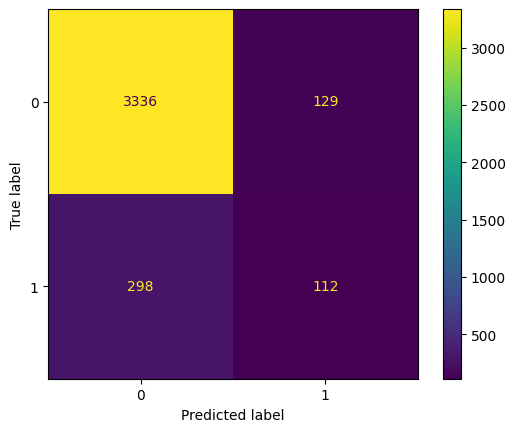

In [3]:
print(grid.best_params_)
y_pred = grid.predict(x_test)
print("Classification report \n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred))
print("Confusion matrix \n=======================")
#print(confusion_matrix(y_true=y_test, y_pred=y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import QuantileTransformer, StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

#import tensorflow as tf

##### correct skewed data
df = pd.read_csv('bank-additional-full.csv', sep=';')
df = df.drop(['duration'], axis=1)
df = df.loc[df['age'] <= 60]
df = df.loc[df['campaign'] <= 20]
df['pdays'] = df['pdays'].replace([999], [-1])
df = df.loc[df['pdays'] <= 15]
df = df.loc[df['job'] != 'unknown']
df = df.loc[df['marital'] != 'unknown']
df = df.loc[df['housing'] != 'unknown']
df = df.loc[df['loan'] != 'unknown']
df = df.loc[df['default'] != 'yes']
df = df.loc[df['education'] != 'illiterat']

df['y'] = df['y'].replace(['no', 'yes'], [0, 1])

### group numerical data
##### pdays
df['pdays'] = df['pdays'].replace(list(range(16)), (['yes']*16))
df['pdays'] = df['pdays'].replace([-1], ('no'))
#### previous
df['previous'] = df['previous'].replace(list(range(1,16,1)), (['yes']*15))
df['previous'] = df['previous'].replace([0], ['no'])

### group categorical data
###### education
degree = ['university.degree', 'professional.course']
basic_school = ['high.school', 'basic.9y', 'basic.4y', 'basic.6y', 'unknown']
df['education'] = df['education'].replace(degree, ['yes']*len(degree))
df['education'] = df['education'].replace(basic_school, ['no']*len(basic_school))

##### job
have_job = ['admin.', 'blue-collar', 'technician', 'services', 'management', 'entrepreneur', 'self-employed', 'housemaid']
no_job = ['retired', 'unemployed', 'student']
df['job'] = df['job'].replace(have_job, ['yes']*len(have_job))
df['job'] = df['job'].replace(no_job, ['no']*len(no_job))

##### marital
alone = ['single', 'divorced']
not_alone = ['married']
df['marital'] = df['marital'].replace(not_alone, ['yes']*len(not_alone))
df['marital'] = df['marital'].replace(alone, ['no']*len(alone))

##### correct skewed data
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=1)
skewed_data_list = ['age','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
x_skew = df[skewed_data_list].values
X_trans = quantile_transformer.fit_transform(x_skew)
df[skewed_data_list] = X_trans

x = df.drop(['y'], axis=1)
y = df['y']

cols = x.columns
num_data = [i for i in cols if (len(x[i].unique()) != 2 and x[i].dtype != 'object')]
cat_data = list(set(cols) - set(num_data))

num_data = pd.Index(num_data)
cat_data = pd.Index(cat_data)

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.1, random_state = 1)
print(len(num_data))
print(len(cat_data))


7
12


In [5]:
k_chi2 = SelectKBest(chi2)
k_mutal = SelectKBest(mutual_info_classif)
k_anova = SelectKBest()
model_DecisionTree = DecisionTreeClassifier(random_state=1)
number_num_feature = list(range(1, 8, 1))
number_cat_feature = list(range(1, 13, 1))
criterion = ["gini", "entropy"]
splitter = ["best", "random"]

num_tran = Pipeline(steps=[("reduce_num_dim", "passthrough"), ("scaler", StandardScaler())])
cat_tran = Pipeline([("one_hot", OneHotEncoder()), ("reduce_cat_dim", "passthrough")])
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_tran, num_data),
        ("cat", cat_tran, cat_data),
    ]
)
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("classify", model_DecisionTree),
    ]
)

param_grid = [
    {
        "preprocessor__num__reduce_num_dim" : [k_mutal, k_anova],
        "preprocessor__num__reduce_num_dim__k" : number_num_feature,
        "preprocessor__cat__reduce_cat_dim" : [k_chi2],
        "preprocessor__cat__reduce_cat_dim__k" : number_cat_feature,
        "classify__criterion" : criterion,
        "classify__splitter" : splitter,
    }
]

grid = GridSearchCV(pipe, n_jobs = -1, param_grid = param_grid, scoring = 'f1', verbose = 5, cv = 10)
grid.fit(x_train, y_train)

Fitting 10 folds for each of 672 candidates, totalling 6720 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('reduce_num_dim',
                                                                                          'passthrough'),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['age', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('one_hot',
                            

{'classify__criterion': 'entropy', 'classify__splitter': 'best', 'preprocessor__cat__reduce_cat_dim': SelectKBest(k=8, score_func=<function chi2 at 0x00000208B3DDFC18>), 'preprocessor__cat__reduce_cat_dim__k': 8, 'preprocessor__num__reduce_num_dim': SelectKBest(k=6,
            score_func=<function mutual_info_classif at 0x00000208B413DC18>), 'preprocessor__num__reduce_num_dim__k': 6}
Classification report 
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3465
           1       0.45      0.25      0.32       410

    accuracy                           0.89      3875
   macro avg       0.68      0.61      0.63      3875
weighted avg       0.87      0.89      0.87      3875

Confusion matrix 


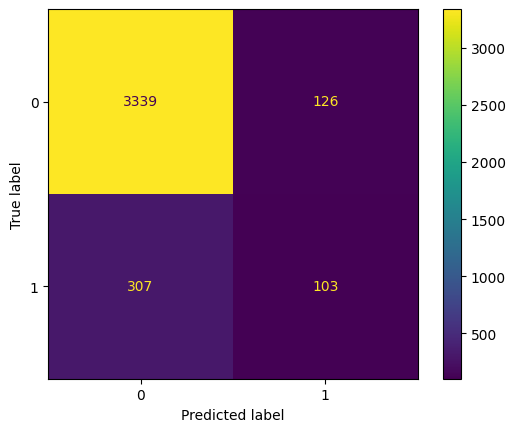

In [6]:
print(grid.best_params_)
y_pred = grid.predict(x_test)
print("Classification report \n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred))
print("Confusion matrix \n=======================")
#print(confusion_matrix(y_true=y_test, y_pred=y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
